# Faces recognition example using eigenfaces and SVMs
RuiZheWang 13163617
Esam Salam 13216914

# 1. Introduction

 We choice a data mining project using an existing package. Discriminative pictures models is a kind of most striking success in deep learning area which usually means a rich sensory information input to the class label. As for the promise of deep learning is to find the hierarchical models because of representing probability distributions over the kinds of data encountered such as information in natural language corpora.

In this case, we use an example of faces recognition which using eigenfaces and SVMs to study and analyse the problem of unconstrained face recognition. In the past decade, there is a rapidly increasing interest and research of video and image face recognition field. While these have been a very good deal of analytic and research in the past decade, however, much of the work is restricted to constrained settings. On these settings, many attitudes and variables can affect the appearance, for example, the pose, facial expression and lighting. At this case, we focus on the "real-life" data sets because we think this could foster the development process of the general techniques and make more flexible face recognition systems. In the future, we might get engineering that is fast, clearly enough scalable and provide an almost real-time face-recognition system and could work in realistic and broad conditions.

Practical Project：define problem is recognition of Top Five Representatives in 5749 Face Recognition Cases and the main project is run it for facial recognition throughout by the SVMs and eigenfaces. Mug shots can also be captured for facial recognition and face recognition systems areas. In this case, we input the Labeled Faces in the Wild(LFW) methods and code in this paper. The first step, we use the LFW dataset and input some example face pictures for our case. This dataset includes 5749 cases of facial recognition by famous people.

Algorithm Implementation: The second step, we discuss the algorithm and define input and output. We split arrays or matrices into the random train and test subsets, on the other hand, load the LFW datasets. The step names "imports", to display progress logs on stdout. As for the part of define input and output, input the dataset and output is the top-five result of representatives in 5749 face recognition examples.

![001.PNG](./001.PNG)

# 2.	Exploration

The Scikit-learn provides two loaders which could automatically download, parse and store data files.

Identify Challenges:Now we meet the process to input data into a single call for splitting (and optionally subsampling) data in a oneliner. On the other hand, as for the number of face about the dataset,we use a limited word to control the full number of the name.

1.![002.PNG](./002.PNG)

In this dataset, we have 5749 classes, 13233 samples pictures total, 5828 dimensionality and the fractures between 0 to 255. These lead to the first challenge: recognize faces by people photos.The each famous people picture is centred on a single face. This process is called the Face Verification process: the process choose a pair of two pictures and binary classifier have to distinguish the two images if from the same person.

As for the result, we use the label to predict is the id of the person. Target label links the LFK datasets, and to distinguish samples and features classes. The second challenge is to plot the person pictures which find the shapes by introspecting the images arrays. So we entered the code by using shape classes to control the size of the people images.Next step is to split the matrices, arrays and classes into the test subsets and the random train by use the "ShuffleSplit" classes. To input data into splitting and optionally subsampling data by into a single call in a oneliner.

2.![003.PNG](./003.PNG)

As for the Face Recognition or Identification is to given and search an unknown person face picture, identify and distinguish the person name by referring to gallery of previously for seen pictures of distinguished persons.


The two advantages of SVM(support vector machines) is it effective in all cases where the number of the dimensions is more than the samples number and could use a subset of training data points in the support vectors. In face recognition area, eigenfaces mean the set of eigenvectors used in kinds of vision problem. Because each image is treated as one vector in the face recognition area, eigenfaces are derived from the covariance matrix of distribution over the high face images vector space.

3.![004.PNG](./004.PNG)

All the facea have already been stored to a normal size. This is a very important process for facial recognition and needs large collection of training data.


4.![005.PNG](./005.PNG)

# 3. Methodology

# 4. Evaluation

# 5. Conclusion

The common face verification addresses usually handle the mainly large intra-class variations, for example, like the expression, illumination and pose. But in LFW databases, we can find main limiting which is even all the negative face pairs are quite easy to find and distinguish. It largely misread the restriction of the unconstrained face verification task. However, the LFW database collection is based on the random imposter assumption, so the main problem for this face verification is still easily with large examples of inter-class variance.

# 6. Ethical

# 7. Video Pitch

See appendix

# Full Process 

Automatically created module for IPython interactive environment
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.222s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.044s
Fitting the classifier to the training set
done in 43.277s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.090s
                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.54      0.67        13
     Colin Powell       0.83      0.87      0.85        60
  Donald Rumsfeld       0.85      0.63      0.72        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.80  

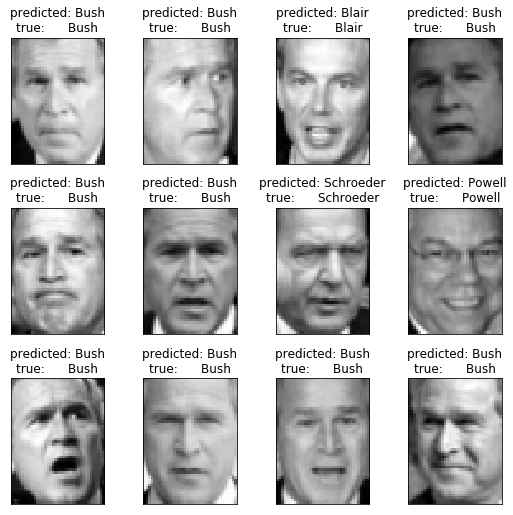

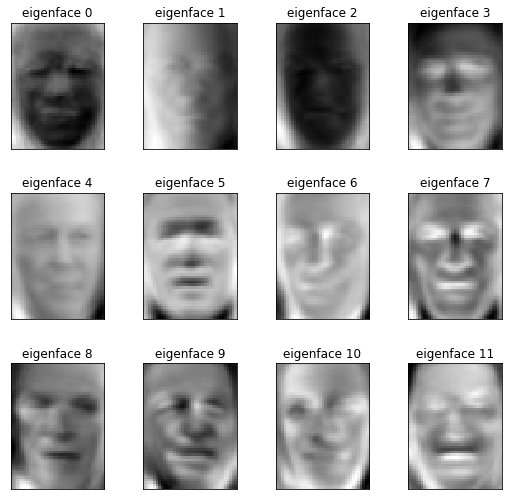

In [3]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()